In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [3]:
data = pd.read_csv('../datasets/Fish.csv')

print(data.columns)
print('\n\n')
print(data.head())

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')



  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


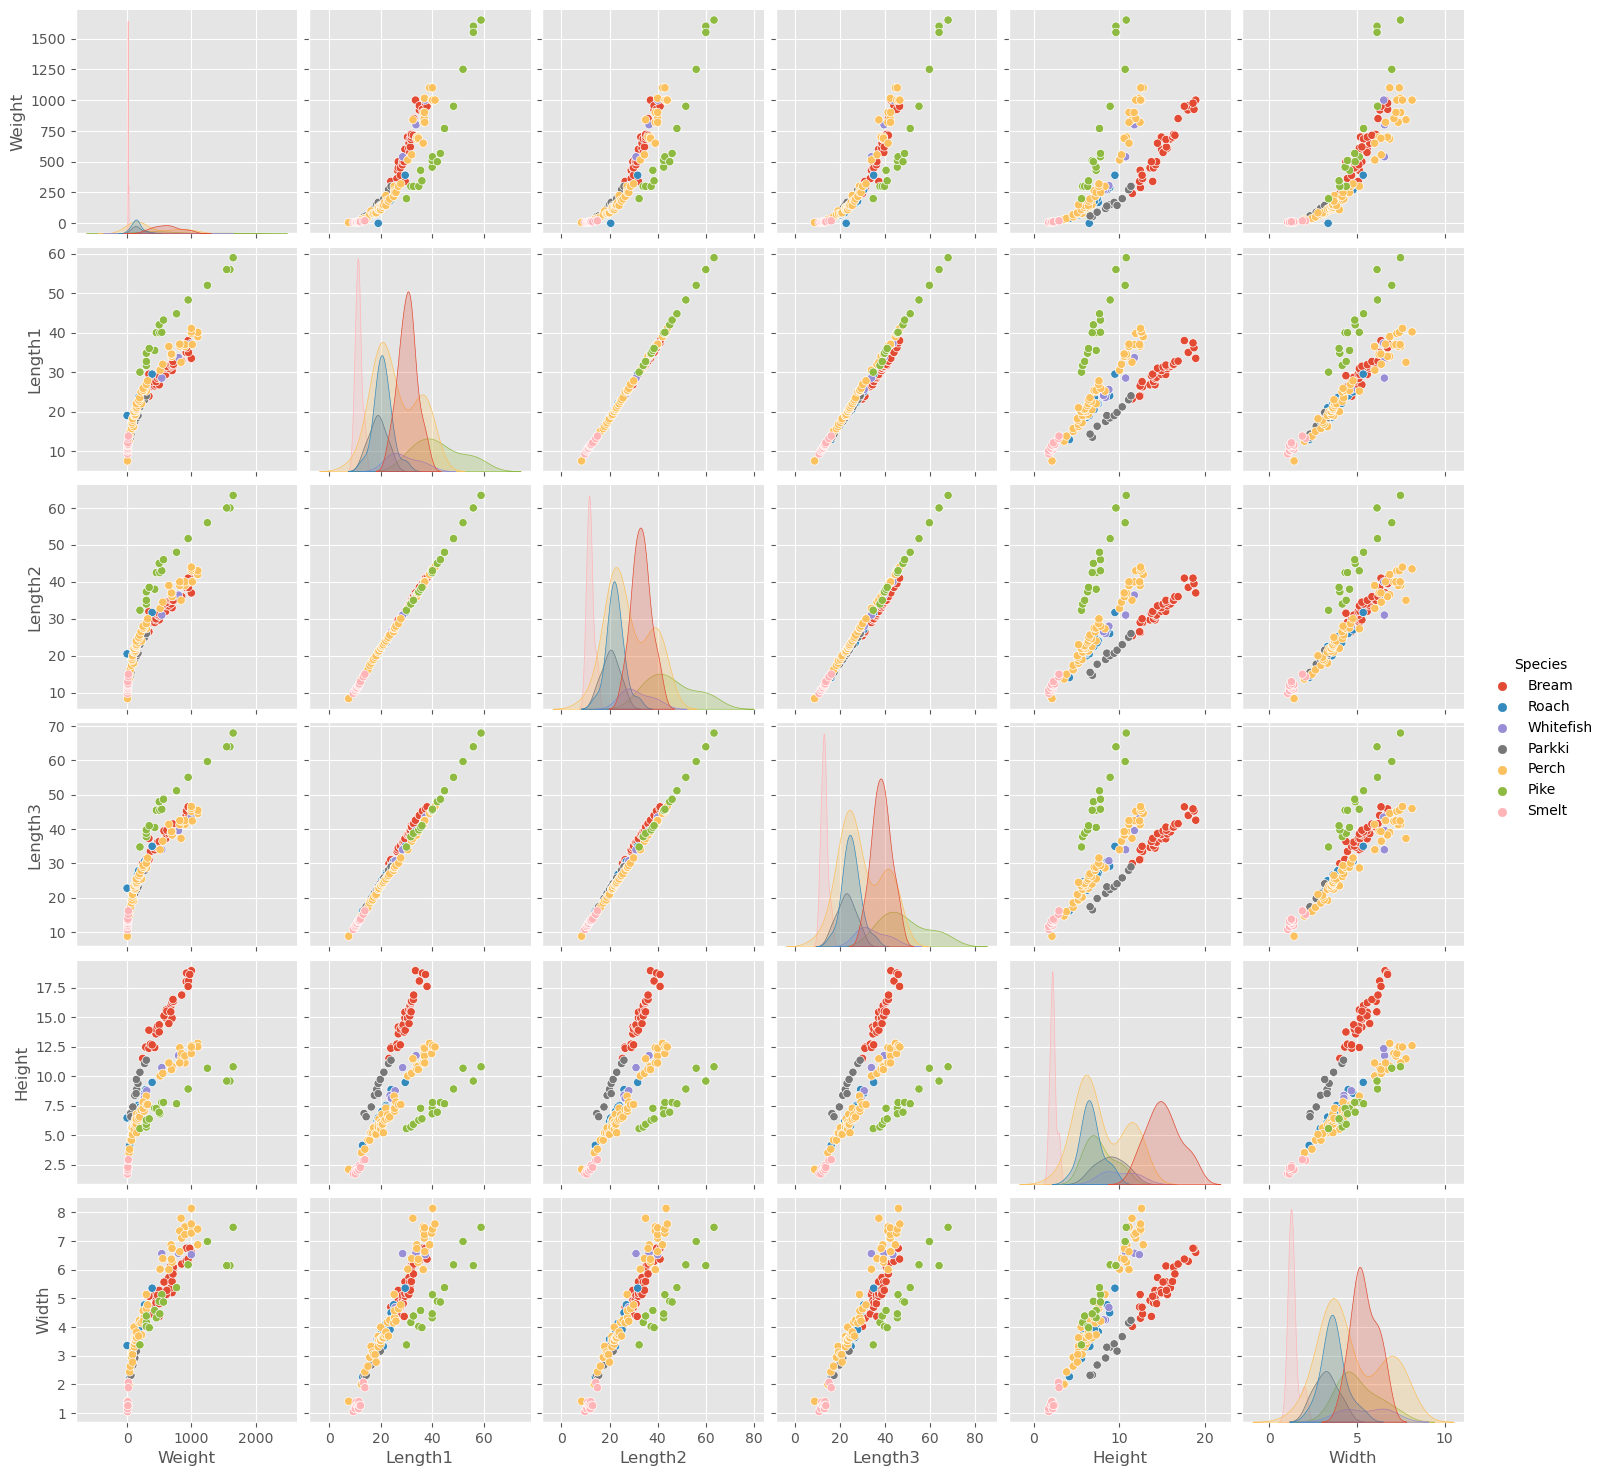

In [4]:
sns.pairplot(data, hue='Species')

In [5]:
Xs = data.Width
ys = data.Weight

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.25, random_state=3)

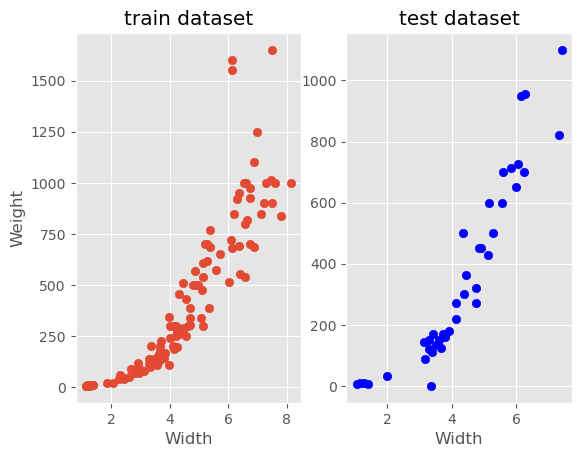

In [6]:
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train)
plt.title('train dataset')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue')
plt.title('test dataset')
plt.xlabel('Width')
# plt.ylabel('Weight')
plt.show()

In [7]:
class linear_regressor : 
    def __init__(self, alpha):
        self.theta0, self.theta1 = self.initializer()
        self.alpha = alpha
        
    def hypothesis(self, x):
        y = self.theta0 + (self.theta1 * x)
        return y
    
    def initializer(self):
        np.random.seed(10)
        return np.random.random(2)
    
    def loss_function(self, x, y):
        if type(x) == float :
            return (1/(2*len(x))) * (self.hypothesis(x) - y)**2
        else :
            return (1/(2*len(x))) * ((self.hypothesis(x) - y)**2).sum()
    
    def update(self, x, y):
        if type(x) == float :
            delta_theta0 = self.hypothesis(x) - y
            delta_theta1 = (self.hypothesis(x) - y) * x
        else :
            delta_theta0 = (self.hypothesis(x) - y).sum() * 1/len(x)
            delta_theta1 = ((self.hypothesis(x) - y) * x).sum() * 1/len(x)
            
        self.theta0 = (self.theta0 - (self.alpha * delta_theta0))
        self.theta1 = (self.theta1 - (self.alpha * delta_theta1))

        
    # def normalizer(self, Xs, ys):
    #     Xs = (Xs - Xs.mean()) / Xs.std()
    #     ys = (ys - Xs.mean()) / Xs.std()
    #     return Xs, ys

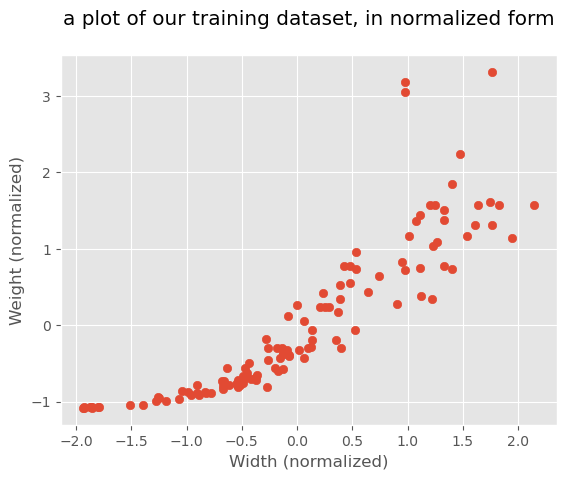

In [8]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)
plt.scatter(X_train_scaled, y_train_scaled)
plt.title('a plot of our training dataset, in normalized form\n')
plt.xlabel('Width (normalized)')
plt.ylabel('Weight (normalized)')
plt.show()

In [9]:
ln_reg = linear_regressor(0.08)
fig, ax = plt.subplots()
loss_on_train = []
loss_on_test = []

def animate(i) :
    loss_on_train.append(ln_reg.loss_function(X_train_scaled, y_train_scaled))
    loss_on_test.append(ln_reg.loss_function(X_test_scaled, y_test_scaled))
    ax.cla()
    ax.set_title('fitting on training dataset\n')
    ax.set_xlabel('Width (normalized)')
    ax.set_ylabel('Weight (normalized)')
    ax.scatter(X_train_scaled, y_train_scaled, alpha=0.7, s=50)
    ax.plot(X_train_scaled, ln_reg.hypothesis(X_train_scaled), color='green')
    ln_reg.update(X_train_scaled, y_train_scaled)

ani = FuncAnimation(fig, animate, frames=40, interval=300)

plt.close()

In [10]:
HTML(ani.to_html5_video())

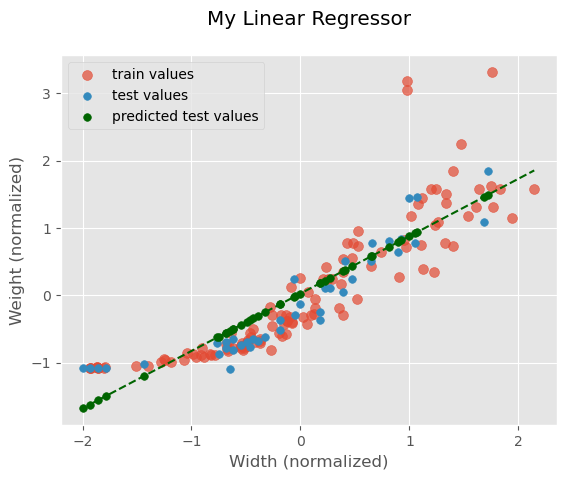

In [11]:
plt.scatter(X_train_scaled, y_train_scaled, label='train values', alpha=0.7, s=50)
plt.scatter(X_test_scaled, y_test_scaled, label='test values', alpha=1, s=30)
plt.scatter(X_test_scaled, ln_reg.hypothesis(X_test_scaled), color='darkgreen', label='predicted test values', s=30)
plt.plot([X_train_scaled.min(), X_train_scaled.max()], [ln_reg.hypothesis(X_train_scaled.min()), ln_reg.hypothesis(X_train_scaled.max())], linestyle='--', color='darkgreen' )
plt.legend()
plt.xlabel('Width (normalized)')
plt.ylabel('Weight (normalized)')
plt.title('My Linear Regressor\n')
plt.show()

[]

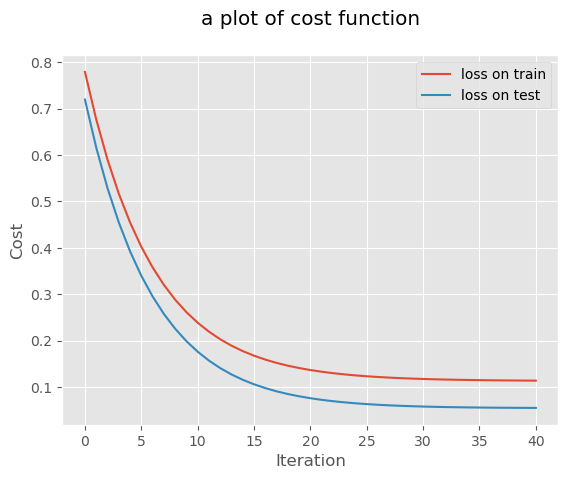

In [12]:
plt.plot(list(range(len(loss_on_train))),loss_on_train, label='loss on train')
plt.plot(list(range(len(loss_on_test))), loss_on_test, label='loss on test')
plt.legend()
plt.title('a plot of cost function\n')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot()

In [13]:
from sklearn import linear_model

sk_reg = linear_model.LinearRegression()
sk_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

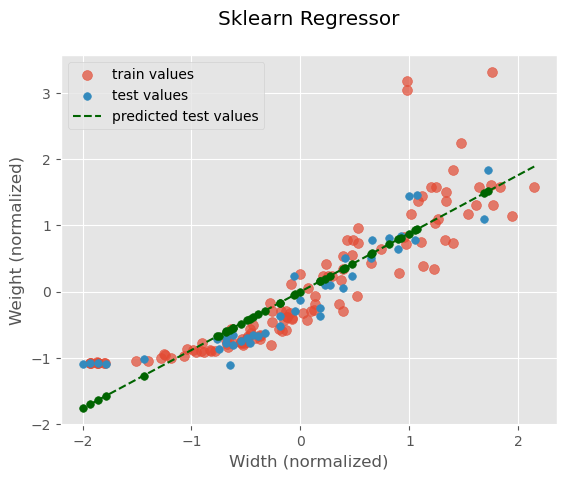

In [14]:
# predicts = []
# for i in tests:
#     predicts.append(sk_reg.predict())

# predicts = sk_reg.predict(X_test)


plt.scatter(X_train_scaled, y_train_scaled, label='train values', alpha=0.7, s=50)
plt.scatter(X_test_scaled, y_test_scaled, label='test values', alpha=1, s=30)
plt.scatter(X_test_scaled, sk_reg.predict(X_test_scaled), color='darkgreen', s=30)
plt.plot([X_train_scaled.min(), X_train_scaled.max()], [sk_reg.predict(X_train_scaled.min().reshape(1, -1))[0][0], sk_reg.predict(X_train_scaled.max().reshape(1, -1))[0][0]], color='darkgreen', linestyle='--', label='predicted test values')
plt.xlabel('Width (normalized)')
plt.ylabel('Weight (normalized)')
plt.title('Sklearn Regressor\n')
plt.legend()
plt.show()



# plt.title('predicting tests values using sklearn linear model\n')
# plt.xlabel('Width')
# plt.ylabel('Weight')
# plt.scatter(Xs, ys)
# plt.plot(tests, predicts)
# plt.show()

In [15]:
def cost_calculator(y, predicted):
    total_lost = 0
    for i in range(len(y)):
        total_lost += ((predicted - y)**2).sum() 
    total_lost = total_lost * (1/(2*len(y)))
    return total_lost

In [16]:
cost1 = cost_calculator(y_test_scaled, ln_reg.hypothesis(X_test_scaled))
cost2 = cost_calculator(y_test_scaled, sk_reg.predict(X_test_scaled))

print('\n-------------------------------------------------------------------------------------------------')
print('final cost of the from scratch version on test dataset :', cost1)
print('-------------------------------------------------------------------------------------------------')
print('final cost of the scikit-learn linear regression model on test dataset :', cost2)
print('-------------------------------------------------------------------------------------------------\n')



-------------------------------------------------------------------------------------------------
final cost of the from scratch version on test dataset : 2.1800166093364948
-------------------------------------------------------------------------------------------------
final cost of the scikit-learn linear regression model on test dataset : 2.171981941178173
-------------------------------------------------------------------------------------------------



In [17]:
class non_linear_regressor:
    def __init__(self, alpha):
        self.alpha = alpha
        self.theta0, self.theta1, self.theta2 = self.initializer()
    
    def initializer(self):
        np.random.seed(10)
        return np.random.random(3)

    def hypothesis(self, x):
        res = self.theta0 + self.theta1 * x + self.theta2 * (x**2)
        return res
    
    def loss_function(self, x, y):
        if type(x) == float :
            return (1 / (2*len(x))) * ((self.hypothesis(x) - y)**2)
        else :
            return (1 / (2*len(x))) * ((self.hypothesis(x) - y)**2).sum()
            
    def update(self, x, y):
        delta_theta0 = (self.hypothesis(x) - y).sum() * (1/len(x))
        delta_theta1 = ((self.hypothesis(x) - y) * x).sum() * (1/len(x))
        delta_theta2 = ((self.hypothesis(x) - y) * (x**2)).sum() * (1/len(x))

        self.theta0 = self.theta0 - self.alpha * delta_theta0
        self.theta1 = self.theta1 - self.alpha * delta_theta1
        self.theta2 = self.theta2 - self.alpha * delta_theta2

    # def normalizer(self, x, y):
    #     x = (x - x.mean()) / x.std()
    #     y = (y - y.mean()) / y.std()
    #     return x, y

In [18]:
# x_values = data.Width
# y_values = data.Weight

# x_values = x_values.sort_values()
# y_values = y_values.sort_values()

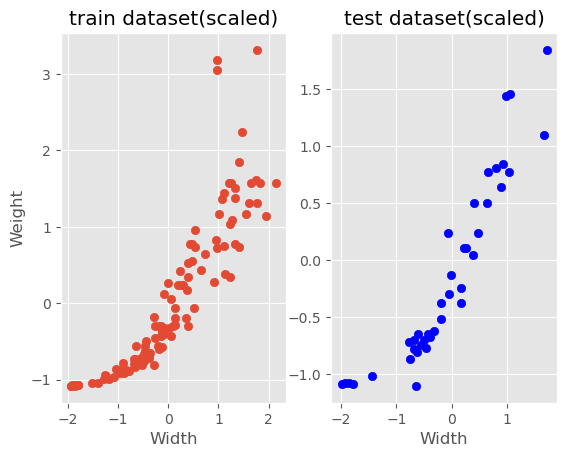

In [19]:
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled, y_train_scaled)
plt.title('train dataset(scaled)')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled, y_test_scaled, color='blue')
plt.title('test dataset(scaled)')
plt.xlabel('Width')
# plt.ylabel('Weight')
plt.show()

In [20]:
non_lin_reg = non_linear_regressor(0.09)
fig3, ax3 = plt.subplots()

train_loss = []
test_loss = []

def animate3(i):
    train_loss.append(non_lin_reg.loss_function(X_train_scaled, y_train_scaled))
    test_loss.append(non_lin_reg.loss_function(X_test_scaled, y_test_scaled))
    ax3.cla()
    ax3.scatter(X_train_scaled, y_train_scaled, label='train values', alpha=0.7)
    ax3.scatter(X_train_scaled, non_lin_reg.hypothesis(X_train_scaled), label='predicted train values')
    non_lin_reg.update(X_train_scaled, y_train_scaled)
    ax3.set_xlabel('Width (normalized)')
    ax3.set_ylabel('Weight (normalized)')
    ax3.set_title('fitting on train data')
    ax3.legend()


ani3 = FuncAnimation(fig3, animate3, frames=100, interval=100)
plt.close()

In [21]:
HTML(ani3.to_html5_video())

[]

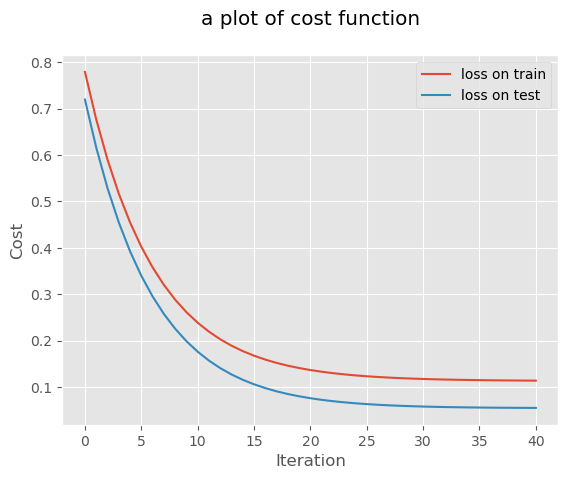

In [27]:
plt.plot(list(range(len(loss_on_train))),loss_on_train, label='loss on train')
plt.plot(list(range(len(loss_on_test))), loss_on_test, label='loss on test')
plt.legend()
plt.title('a plot of cost function\n')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot()

In [22]:
XX_train_scaled = np.concatenate([X_train_scaled, X_train_scaled ** 2], axis=1)
XX_test_scaled = np.concatenate([X_test_scaled, X_test_scaled ** 2], axis=1)
print(XX_train_scaled[:5]) 
sklearn_non_reg = linear_model.LinearRegression()
sklearn_non_reg.fit(XX_train_scaled, y_train_scaled)

[[-0.28397898  0.08064406]
 [ 0.39278689  0.15428154]
 [ 0.38829572  0.15077357]
 [ 0.06569019  0.0043152 ]
 [-0.41381443  0.17124238]]


LinearRegression()

In [23]:
# sklearn_non_reg.predict(np.array(new_x_values.iloc[0]).reshape(-1, 1))
# sklearn_non_reg.predict([[new_x_values.iloc[0][0], new_x_values.iloc[0][1]]])
# np.array(new_x_values.iloc[0]).reshape(-1, 1)
# new_x_values.iloc[0][1]
sklearn_non_reg.predict(XX_train_scaled).min()

-1.2532073074854513

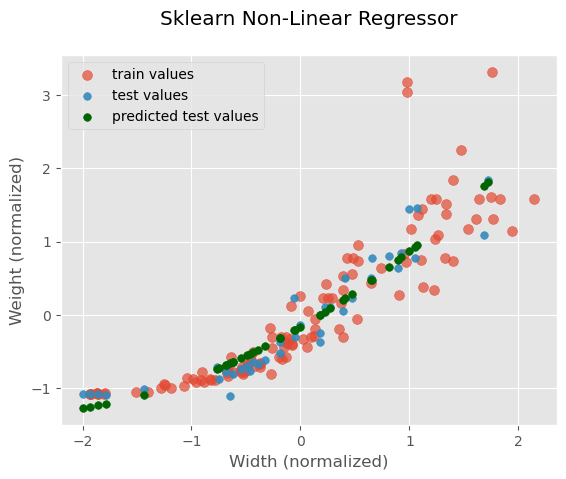

In [24]:
plt.scatter(X_train_scaled, y_train_scaled, label='train values', alpha=0.7, s=50)
plt.scatter(X_test_scaled, y_test_scaled, label='test values', alpha=0.9, s=30)
plt.scatter(X_test_scaled, sklearn_non_reg.predict(XX_test_scaled), color='darkgreen', s=30, label='predicted test values')
# plt.scatter(X_train_scaled, sklearn_non_reg.predict(XX_train_scaled), color='black', alpha=1, s = 2)
plt.xlabel('Width (normalized)')
plt.ylabel('Weight (normalized)')
plt.title('Sklearn Non-Linear Regressor\n')
plt.legend()
plt.show()

In [25]:
cost1 = cost_calculator(y_test_scaled, non_lin_reg.hypothesis(X_test_scaled))
cost2 = cost_calculator(y_test_scaled, sklearn_non_reg.predict(XX_test_scaled))

print('\n-------------------------------------------------------------------------------------------------')
print('final cost of the from scratch version on test dataset :', cost1)
print('-------------------------------------------------------------------------------------------------')
print('final cost of the scikit-learn linear regression model on test dataset :', cost2)
print('-------------------------------------------------------------------------------------------------\n')


-------------------------------------------------------------------------------------------------
final cost of the from scratch version on test dataset : 1.1656073690840005
-------------------------------------------------------------------------------------------------
final cost of the scikit-learn linear regression model on test dataset : 1.154848263681793
-------------------------------------------------------------------------------------------------



In [26]:
predicts = []
# x_values = x_values.sort_values()
for i in range(len(x_values)):
    predicts.append(sklearn_non_reg.predict([new_x_values.iloc[i][0], new_x_values.iloc[i][1]]))
    # predicts.append(sklearn_non_reg.predict(np.array(x_values.iloc[i]).reshape(-1, 1), np.array((x_values ** 2).iloc[i]).reshape(-1, 1)))
# print(predicts)

plt.title('predicting tests values using sklearn linear model\n')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.scatter(x_values, y_values)
plt.plot(x_values, predicts)
plt.show()

NameError: name 'x_values' is not defined

In [ ]:
# some clean ups 
# read some other linear regression notebooks and get some ideas
# do linear regression with scikit learn and compare it with the from scratch version *
# do another regressor on unnormalized data and compare the results *
# write text including LaTeX form of functions
# write another class for non-linear regression (adding a extra feature)
